In [1]:
from api_24sea.core import API
from config import settings
import pandas as pd
from pathlib import Path

#api = API().authenticate(**settings.API_24SEA)
#pd.DataFrame(api.get_metrics()).to_csv('metrics.csv', index=False)
# %%
# **Data Retrieval**
""" 
sites = ["norther"]

locations = settings.norther.turbine_list

metrics = ["DEM",'DEM5','wind speed','pitch','yaw','rpm']
# Assigning metrics="all" will retrieve all the metrics available for the
# specified sites and locations.

start_timestamp = "2020-03-01T00:00:00Z"
end_timestamp = "2020-04-01T00:00:00Z"

api.get_data(sites=sites, locations=locations, metrics=metrics, start_timestamp=start_timestamp, end_timestamp=end_timestamp)
"""

' \nsites = ["norther"]\n\nlocations = settings.norther.turbine_list\n\nmetrics = ["DEM",\'DEM5\',\'wind speed\',\'pitch\',\'yaw\',\'rpm\']\n# Assigning metrics="all" will retrieve all the metrics available for the\n# specified sites and locations.\n\nstart_timestamp = "2020-03-01T00:00:00Z"\nend_timestamp = "2020-04-01T00:00:00Z"\n\napi.get_data(sites=sites, locations=locations, metrics=metrics, start_timestamp=start_timestamp, end_timestamp=end_timestamp)\n'

In [71]:
import pandas as pd
dp_p = Path(settings.path.processed,'processed.db')
assert dp_p.exists()
# load the timestamp column of th data 
df = pd.read_sql('SELECT timestamp, turbine_name, RMS_X FROM processed_data', f'sqlite:///{dp_p}')

In [72]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
#remove duplicates
df['timestamp']

0        2023-07-04 00:00:00+00:00
1        2023-07-04 00:10:00+00:00
2        2023-07-04 00:20:00+00:00
3        2023-07-04 00:30:00+00:00
4        2023-07-04 00:40:00+00:00
                    ...           
139837   2023-07-05 23:10:00+00:00
139838   2023-07-05 23:20:00+00:00
139839   2023-07-05 23:30:00+00:00
139840   2023-07-05 23:40:00+00:00
139841   2023-07-05 23:50:00+00:00
Name: timestamp, Length: 139842, dtype: datetime64[ns, UTC]

In [73]:
#excel_scada = Path(settings.path.scada, 'dataframes_unconcatenated.xlsx')
path_scada = Path(settings.path.scada, 'scada.csv')
assert path_scada.exists()
df_scada = pd.read_csv(path_scada)
                   

In [74]:
len(df_scada.drop_duplicates(subset=['timestamp', 'turbine_name'])) == len(df_scada)

True

In [75]:
df_scada['turbine_name'] = "NRT"+df_scada['turbine_name']

In [76]:
df_scada['DEM_TP_SG_LAT014_Mtl'].dropna()

929934     384920.132034
929935     385216.041675
929936     341362.127410
929937     444991.675091
929938     392536.916822
               ...      
4092446    178261.349501
4092447    226103.812607
4092448    222531.417195
4092449    241790.723785
4092450    166596.547366
Name: DEM_TP_SG_LAT014_Mtl, Length: 62682, dtype: float64

In [77]:
df_scada.columns

Index(['timestamp', 'mean_windspeed', 'min_windspeed', 'max_windspeed',
       'std_windspeed', 'mean_yaw', 'min_yaw', 'max_yaw', 'std_yaw',
       'mean_power', 'min_power', 'max_power', 'std_power', 'mean_pitch',
       'min_pitch', 'max_pitch', 'std_pitch', 'mean_rpm', 'min_rpm', 'max_rpm',
       'std_rpm', 'mean_winddirection', 'min_winddirection',
       'max_winddirection', 'std_winddirection', 'mean_NAC_ACC_Z',
       'min_NAC_ACC_Z', 'max_NAC_ACC_Z', 'rms_NAC_ACC_Z', 'rms1p_NAC_ACC_Z',
       'mean_NAC_ACC_FA', 'min_NAC_ACC_FA', 'max_NAC_ACC_FA', 'rms_NAC_ACC_FA',
       'rms1p_NAC_ACC_FA', 'mean_NAC_ACC_SS', 'min_NAC_ACC_SS',
       'max_NAC_ACC_SS', 'rms_NAC_ACC_SS', 'rms1p_NAC_ACC_SS', 'mean_ti',
       'pred_Mtn_legacy', 'relative_wind_dir', 'pred_Mtn_dnn', 'Mean_muY',
       'CoV', 'std_NAC_ACC_Z', 'std_NAC_ACC_FA', 'std_NAC_ACC_SS', 'caseID',
       'turbine_name', 'DEM5_TP_SG_LAT014_Mtn', 'DEM5_TP_SG_LAT014_Mtl',
       'std_TP_SG_LAT014_Mtl', 'max_TP_SG_LAT014_Mtn', 'm

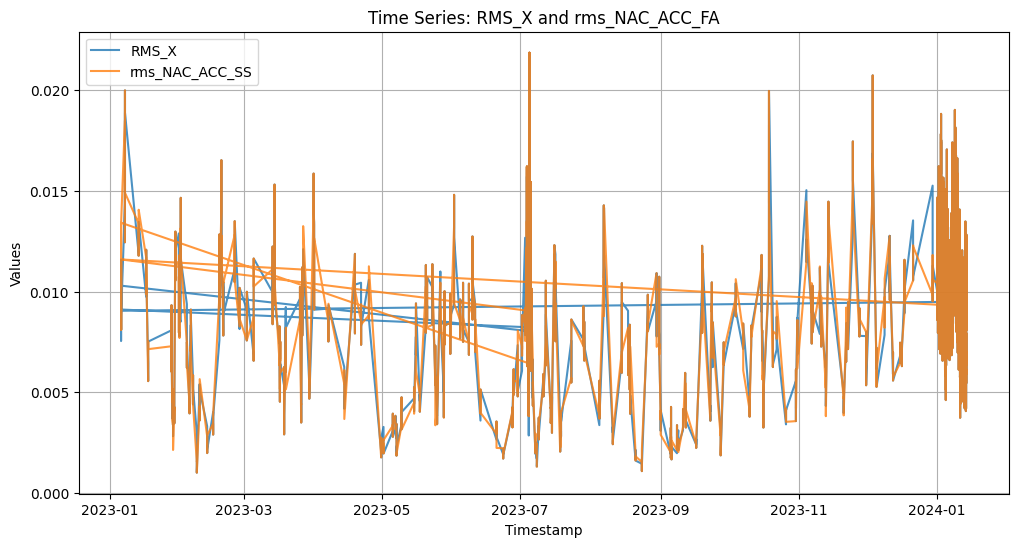

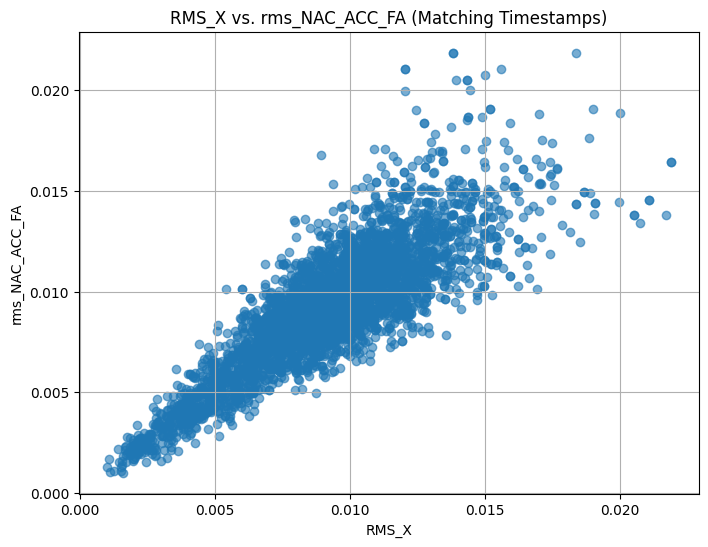

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamps to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_scada['timestamp'] = pd.to_datetime(df_scada['timestamp'], format='ISO8601')

# Filter for specific turbine
df_filtered = df.query('turbine_name == "NRTA01"')[['timestamp', 'RMS_X']]
df_scada_filtered = df_scada.query('turbine_name == "NRTA01"')[['timestamp', 'rms_NAC_ACC_SS']]

# Merge on timestamp (inner join to keep only matching timestamps)
merged = pd.merge(df_filtered, df_scada_filtered, on='timestamp', how='inner')

# Plot the two variables over time
plt.figure(figsize=(12, 6))
plt.plot(merged['timestamp'], merged['RMS_X'], label='RMS_X', alpha=0.8)
plt.plot(merged['timestamp'], merged['rms_NAC_ACC_SS'], label='rms_NAC_ACC_SS', alpha=0.8)
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series: RMS_X and rms_NAC_ACC_FA')
plt.legend()
plt.grid()
plt.show()

# Scatter plot of one variable against the other
plt.figure(figsize=(8, 6))
plt.scatter(merged['RMS_X'], merged['rms_NAC_ACC_SS'], alpha=0.6)
plt.xlabel('RMS_X')
plt.ylabel('rms_NAC_ACC_FA')
plt.title('RMS_X vs. rms_NAC_ACC_FA (Matching Timestamps)')
plt.grid()
plt.show()


In [79]:
df_indices = pd.MultiIndex.from_arrays([df['timestamp'], df['turbine_name']])
scada_indices = pd.MultiIndex.from_arrays([df_scada['timestamp'], df_scada['turbine_name']])

# Boolean mask where both timestamp and turbine_name match
mask = scada_indices.isin(df_indices)

# Apply the mask to filter df_scada
df_scada_filtered = df_scada[mask]


In [80]:
df_scada['DEM5_TP_SG_LAT014_Mtn'].dropna()

837917     1.530539e+06
837918     1.986822e+06
837919     1.385831e+06
837920     1.274496e+06
837921     1.673767e+06
               ...     
4092446    5.021189e+05
4092447    5.869126e+05
4092448    5.529795e+05
4092449    5.113351e+05
4092450    6.769903e+05
Name: DEM5_TP_SG_LAT014_Mtn, Length: 505190, dtype: float64

In [81]:
df_scada_filtered['DEM5_TP_SG_LAT014_Mtn'].dropna()

847405     2.205209e+06
847406     1.174090e+06
847407     9.879371e+05
847408     8.712107e+05
847409     9.084173e+05
               ...     
4050404    1.010074e+06
4050405    1.219029e+06
4050406    1.778227e+06
4050407    1.394881e+06
4050408    1.400972e+06
Name: DEM5_TP_SG_LAT014_Mtn, Length: 14476, dtype: float64

In [82]:
print('DEM_TP_SG_LAT014_Mtl' in df_scada_filtered.columns)
print(df_scada['DEM_TP_SG_LAT014_Mtl'].dropna().shape)
print(df_scada_filtered['DEM_TP_SG_LAT014_Mtl'].dropna().shape)

True
(62682,)
(0,)


In [83]:
df_scada.query('turbine_name == "NRTC01"')['DEM5_TP_SG_LAT014_Mtl']

837917    1.145088e+06
837918    1.288720e+06
837919    1.273129e+06
837920    1.279599e+06
837921    1.474770e+06
              ...     
943177    2.842749e+05
943178    3.234515e+05
943179    3.140318e+05
943180    2.863458e+05
943181    3.076256e+05
Name: DEM5_TP_SG_LAT014_Mtl, Length: 105265, dtype: float64

In [84]:
df_scada_filtered['turbine_name'].unique()

array(['NRTA01', 'NRTA02', 'NRTA03', 'NRTA04', 'NRTB01', 'NRTB02',
       'NRTB03', 'NRTB04', 'NRTC01', 'NRTC02', 'NRTC03', 'NRTC04',
       'NRTD01', 'NRTD02', 'NRTD03', 'NRTD04', 'NRTE01', 'NRTE02',
       'NRTE03', 'NRTE04', 'NRTF01', 'NRTF02', 'NRTF03', 'NRTF04',
       'NRTG01', 'NRTG02', 'NRTG03', 'NRTG04', 'NRTH01', 'NRTH02',
       'NRTH03', 'NRTH04', 'NRTI01', 'NRTI02', 'NRTI03', 'NRTI04',
       'NRTJ01', 'NRTJ02', 'NRTJ03', 'NRTJ04', 'NRTK01', 'NRTK02',
       'NRTK03', 'NRTK04'], dtype=object)

In [85]:
len(df_scada_filtered) - len(df)

-2100

In [86]:
db_path = Path(settings.path.processed, 'processed.db')
assert db_path.exists(), f"Database file does not exist at {db_path}"
import sqlite3
# Create SQLAlchemy engine
conn = sqlite3.connect(db_path)
# drop the table if it exists
conn.execute('DROP TABLE IF EXISTS scada')
df_scada_filtered.to_sql(name='scada',
                con=conn,
                if_exists='replace',
                index=False)

137742

In [37]:
dfs = []
for sheet_name, df in all_sheets.items():
    df.columns = df.columns.str.replace(r'NRT_[^_]+_', '', regex=True)
    dfs.append(df)

In [38]:
dfs = pd.concat(dfs, ignore_index=True)

In [42]:
dfs['DEM5_TP_SG_LAT014_Mtn'].min(), dfs['DEM5_TP_SG_LAT014_Mtn'].max()

(np.float64(107433.0649267725), np.float64(6568131.624685491))

In [ ]:
list(settings.norther['fleet_leader'])


['NRTC01', 'NRTC03', 'NRTH01', 'NRTF03', 'NRTJ03']

In [56]:
fleet_leaders = list(settings.norther.fleet_leader)

for leader in fleet_leaders:
    sheet = all_sheets.get(leader)
    columns = sheet.columns
    # print columns that contain the word 'DEM'API
    print(columns[columns.str.contains('DEM')])

Index(['DEM5_TP_SG_LAT014_Mtn', 'DEM5_TP_SG_LAT014_Mtl',
       'DEM_TP_SG_LAT014_Mtl', 'DEM_TP_SG_LAT014_Mtn'],
      dtype='object')
Index(['DEM5_TP_SG_LAT014_Mtn', 'DEM5_TP_SG_LAT014_Mtl',
       'DEM_TP_SG_LAT014_Mtl', 'DEM_TP_SG_LAT014_Mtn'],
      dtype='object')
Index(['DEM5_TP_SG_LAT014_Mtn', 'DEM5_TP_SG_LAT014_Mtl',
       'DEM_TP_SG_LAT014_Mtl', 'DEM_TP_SG_LAT014_Mtn'],
      dtype='object')
Index(['DEM5_TP_SG_LAT014_Mtn', 'DEM5_TP_SG_LAT014_Mtl',
       'DEM_TP_SG_LAT014_Mtl', 'DEM_TP_SG_LAT014_Mtn'],
      dtype='object')
Index(['DEM5_TP_SG_LAT014_Mtn', 'DEM5_TP_SG_LAT014_Mtl',
       'DEM_TP_SG_LAT014_Mtl', 'DEM_TP_SG_LAT014_Mtn'],
      dtype='object')
